In [ ]:
# Linear Regression

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random
import numpy as np
import tensorflow as tf

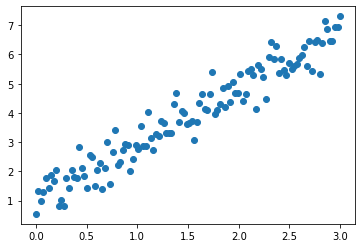

In [ ]:
np.random.seed(13) # pick the seed for reproducability - change it to explore the effects of random variations

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5 # 2x + 0.9 + Noise

plt.scatter(train_x,train_labels)


In [ ]:
input_dim = 1
output_dim = 1
learning_rate = 0.1

# This is our weight matrix
w = tf.Variable([[100.0]])
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def f(x):
  return tf.matmul(x,w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

In [ ]:
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = f(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [ ]:
# Shuffle the data.
indices = np.random.permutation(len(train_x))
features = tf.constant(train_x[indices],dtype=tf.float32)
labels = tf.constant(train_labels[indices],dtype=tf.float32)

In [ ]:
%time
batch_size = 4
for epoch in range(10):
  for i in range(0,len(features),batch_size):
    loss = train_on_batch(tf.reshape(features[i:i+batch_size],(-1,1)),tf.reshape(labels[i:i+batch_size],(-1,1)))
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807
Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390
Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


In [ ]:
w,b

(<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.8616778]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0710956], dtype=float32)>)

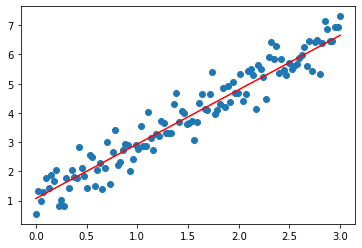

In [ ]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])
y = w.numpy()[0,0]*x+b.numpy()[0]
plt.plot(x,y,color='red')

In [ ]:
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = f(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [ ]:
w.assign([[10.0]])
b.assign([0.0])

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((train_x.astype(np.float32), train_labels.astype(np.float32)))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(tf.reshape(x,(-1,1)), tf.reshape(y,(-1,1)))
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 173.4585
Epoch 1: last batch loss = 13.8459
Epoch 2: last batch loss = 4.5407
Epoch 3: last batch loss = 3.7364
Epoch 4: last batch loss = 3.4334
Epoch 5: last batch loss = 3.1790
Epoch 6: last batch loss = 2.9458
Epoch 7: last batch loss = 2.7311
Epoch 8: last batch loss = 2.5332
Epoch 9: last batch loss = 2.3507


In [ ]:
# Classification

In [ ]:
np.random.seed(0) # pick the seed for reproducibility - change it to explore the effects of random variations

n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.05,class_sep=1.5)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [ 70*n//100, (15+70)*n//100 ]
train_x, valid_x, test_x = np.split(X, split)
train_labels, valid_labels, test_labels = np.split(Y, split)

In [ ]:
def plot_dataset(features, labels, W=None, b=None):
    # prepare the plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,1])
        min_y = min(features[:,1])*(1-.1)
        max_y = max(features[:,1])*(1+.1)
        cx = np.array([min_x,max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

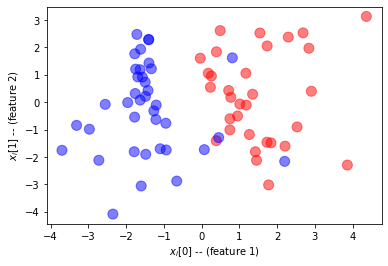

In [ ]:
plot_dataset(train_x, train_labels)

In [ ]:
train_x_norm = (train_x-np.min(train_x)) / (np.max(train_x)-np.min(train_x))
valid_x_norm = (valid_x-np.min(train_x)) / (np.max(train_x)-np.min(train_x))
test_x_norm = (test_x-np.min(train_x)) / (np.max(train_x)-np.min(train_x))

In [ ]:
W = tf.Variable(tf.random.normal(shape=(2,1)),dtype=tf.float32)
b = tf.Variable(tf.zeros(shape=(1,),dtype=tf.float32))

learning_rate = 0.1

@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    z = tf.matmul(x, W) + b
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=z))
  dloss_dw, dloss_db = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [ ]:
# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((train_x_norm.astype(np.float32), train_labels.astype(np.float32)))
dataset = dataset.shuffle(128).batch(2)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, tf.expand_dims(y,1))
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.6567
Epoch 1: last batch loss = 0.6396
Epoch 2: last batch loss = 0.6153
Epoch 3: last batch loss = 0.5615
Epoch 4: last batch loss = 0.5291
Epoch 5: last batch loss = 0.6430
Epoch 6: last batch loss = 0.6079
Epoch 7: last batch loss = 0.5877
Epoch 8: last batch loss = 0.4387
Epoch 9: last batch loss = 0.5740


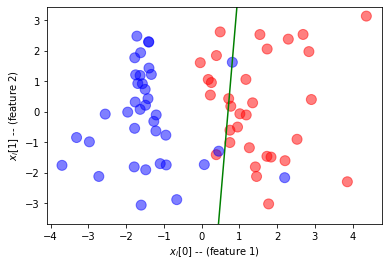

In [ ]:
plot_dataset(train_x,train_labels,W.numpy(),b.numpy())

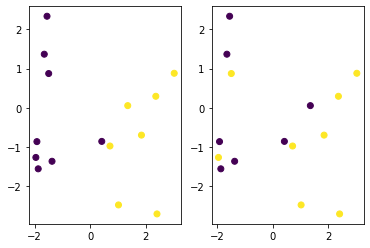

In [ ]:
pred = tf.matmul(test_x,W)+b
fig,ax = plt.subplots(1,2)
ax[0].scatter(test_x[:,0],test_x[:,1],c=pred[:,0]>0.5)
ax[1].scatter(test_x[:,0],test_x[:,1],c=valid_labels)

In [ ]:
tf.reduce_mean(tf.cast(((pred[0]>0.5)==test_labels),tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=0.46666667>

## Обучение

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.01)

W = tf.Variable(tf.random.normal(shape=(2,1)))
b = tf.Variable(tf.zeros(shape=(1,),dtype=tf.float32))

@tf.function
def train_on_batch(x, y):
  vars = [W, b]
  with tf.GradientTape() as tape:
    z = tf.sigmoid(tf.matmul(x, W) + b)
    loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(z,y))
    correct_prediction = tf.equal(tf.round(y), tf.round(z))
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    grads = tape.gradient(loss, vars)
    optimizer.apply_gradients(zip(grads,vars))
  return loss,acc

for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss,acc = train_on_batch(tf.reshape(x,(-1,2)), tf.reshape(y,(-1,1)))
  print('Epoch %d: last batch loss = %.4f, acc = %.4f' % (epoch, float(loss),acc))

Epoch 0: last batch loss = 7.3744, acc = 0.5000
Epoch 1: last batch loss = 8.4081, acc = 0.0000
Epoch 2: last batch loss = 6.6790, acc = 1.0000
Epoch 3: last batch loss = 7.1087, acc = 0.5000
Epoch 4: last batch loss = 7.9136, acc = 0.5000
Epoch 5: last batch loss = 6.3442, acc = 1.0000
Epoch 6: last batch loss = 7.6614, acc = 0.5000
Epoch 7: last batch loss = 7.9683, acc = 0.0000
Epoch 8: last batch loss = 7.2163, acc = 0.5000
Epoch 9: last batch loss = 6.6775, acc = 1.0000
Epoch 10: last batch loss = 7.1995, acc = 1.0000
Epoch 11: last batch loss = 6.2557, acc = 1.0000
Epoch 12: last batch loss = 6.1544, acc = 0.5000
Epoch 13: last batch loss = 6.8132, acc = 1.0000
Epoch 14: last batch loss = 7.0699, acc = 1.0000
Epoch 15: last batch loss = 5.6212, acc = 1.0000
Epoch 16: last batch loss = 6.7636, acc = 1.0000
Epoch 17: last batch loss = 6.4788, acc = 1.0000
Epoch 18: last batch loss = 7.2475, acc = 0.5000
Epoch 19: last batch loss = 6.5704, acc = 1.0000


In [ ]:
inputs = tf.keras.Input(shape=(2,))
z = tf.keras.layers.Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid')(inputs)
model = tf.keras.models.Model(inputs,z)

model.compile(tf.keras.optimizers.Adam(0.1),'binary_crossentropy',['accuracy'])
model.summary()
h = model.fit(train_x_norm,train_labels,batch_size=8,epochs=15)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
9/9 [==============================] - 1s 2ms/step - loss: 0.7523 - accuracy: 0.3429
Epoch 2/15
9/9 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 3/15
9/9 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.7000
Epoch 4/15
9/9 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.9429
Epoch 5/15
9/9 [==============================] - 0s 1ms/step - loss: 0.5902 - 

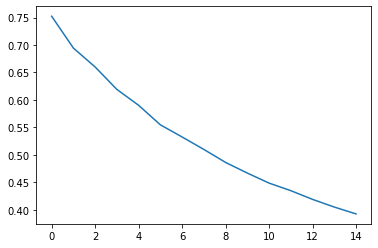

In [ ]:
plt.plot(h.history['loss'])

## Sequential Interface

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(5,activation='sigmoid',input_shape=(2,)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(tf.keras.optimizers.Adam(0.1),'binary_crossentropy',['accuracy'])
model.summary()
model.fit(train_x_norm,train_labels,validation_data=(test_x_norm,test_labels),batch_size=8,epochs=15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
9/9 [==============================] - 0s 18ms/step - loss: 0.7158 - accuracy: 0.4857 - val_loss: 0.7169 - val_accuracy: 0.4667
Epoch 2/15
9/9 [==============================] - 0s 4ms/step - loss: 0.7165 - accuracy: 0.3429 - val_loss: 0.6711 - val_accuracy: 0.5333
Epoch 3/15
9/9 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6000 - val_loss: 0.6766 - val_accuracy: 0.4667
Epoch 4/15
9/9 [=========================

In [ ]:
class DenseNN(tf.Module):
  def __init__(self, outputs):
    super().__init__()
    self.outputs = outputs
    self.fl_init = False

  def __call__(self, x):
    if not self.fl_init:
      self.w = tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name="W")
      self.b = tf.zeros([self.outputs], dtype=tf.float32, name="b")

      self.w = tf.Variable(self.w)
      self.b = tf.Variable(self.b)

      self.fl_init = True
    y = x @ self.w + self.b
    return y

## Обучение

In [ ]:
model = DenseNN(1)
x_train = tf.random.uniform(minval=0, maxval=10, shape=(100, 2))
y_train = [a + b for a, b in x_train]
loss = lambda x, y: tf.reduce_mean(tf.square(x - y))

opt = tf.optimizers.Adam(learning_rate=0.01)


EPOCHS = 50
for n in range(EPOCHS):
  for x, y in zip(x_train, y_train):
    x = tf.expand_dims(x, axis=0) # (2, 5) -> (1, 2, 5)
    y = tf.constant(y, shape=(1, 1))

    with tf.GradientTape() as tape:
      f_loss = loss(y, model(x))

    grads = tape.gradient(f_loss, model.trainable_variables)
    opt.apply_gradients(zip(grads, model.trainable_variables))

  print(f_loss.numpy())

14.870795
0.47005558
0.041084446
0.027406247
0.023464441
0.019890893
0.01665643
0.013774292
0.011226286
0.008989571
0.007049211
0.0053949156
0.004018385
0.0029054931
0.0020345454
0.001376681
0.0008979824
0.0005628998
0.00033783048
0.000193125
0.00010434225
5.2712283e-05
2.4479363e-05
1.0164194e-05
3.5872254e-06
9.574032e-07
1.327171e-07
2.9467628e-10
5.1951247e-08
1.02678314e-07
1.13331225e-07
9.5475116e-08
6.7288056e-08
4.2433385e-08
2.4164365e-08
1.2663804e-08
6.726623e-09
3.0595402e-09
1.3833414e-09
5.2386895e-10
2.0463631e-10
7.366907e-11
2.2737368e-11
3.637979e-12
9.094947e-13
0.0
0.0
0.0
0.0
9.094947e-13


In [ ]:
print(model(tf.constant([[1.0, 2.0]])))
print(model(tf.constant([[5.0, 2.0]])))

tf.Tensor([[3.0000024]], shape=(1, 1), dtype=float32)
tf.Tensor([[7.000001]], shape=(1, 1), dtype=float32)


## Multiclass Classification

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

x_train = tf.reshape(tf.cast(x_train, tf.float32), [-1, 28*28])
x_test = tf.reshape(tf.cast(x_test, tf.float32), [-1, 28*28])

y_train = to_categorical(y_train, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

TensorShape([60000, 784])

In [ ]:
class DenseNN(tf.Module):
  def __init__(self, outputs, activate="relu"):
    super().__init__()
    self.outputs = outputs
    self.activate = activate
    self.fl_init = False

  def __call__(self, x):
    if not self.fl_init:
      self.w = tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name="W")
      self.b = tf.zeros([self.outputs], dtype=tf.float32, name="b")

      self.w = tf.Variable(self.w)
      self.b = tf.Variable(self.b)

      self.fl_init = True
    y = x @ self.w + self.b

    if self.activate == "relu":
      return tf.nn.relu(y)
    elif self.activate == "softmax":
      return tf.nn.softmax(y)

In [ ]:
hidden_layer = DenseNN(128)
output_layer = DenseNN(10, activate="softmax")

def model_predict(x):
  return output_layer(hidden_layer(x))

cross_entropy = lambda y_true, y_pred: tf.reduce_mean(tf.losses.categorical_crossentropy(y_true, y_pred))

opt = tf.optimizers.Adam(learning_rate=0.001)

BATCH_SIZE = 32
EPOCHS = 10
TOTAL = x_train.shape[0]

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)


## Обучение

In [ ]:
for n in range(EPOCHS):
  loss = 0
  for x_batch, y_batch in train_dataset:

    with tf.GradientTape() as tape:
      f_loss = cross_entropy(y_batch, model_predict(x_batch))
    loss += f_loss
    grads = tape.gradient(f_loss, [hidden_layer.trainable_variables, output_layer.trainable_variables])
    opt.apply_gradients(zip(grads[1], output_layer.trainable_variables))
    opt.apply_gradients(zip(grads[0], hidden_layer.trainable_variables))

  print(loss.numpy())

469.3203
203.14494
141.274
104.05551
79.96126


KeyboardInterrupt: ignored

## Метрики

In [ ]:
y = model_predict(x_test)

y2 = tf.argmax(y , axis=1).numpy()
acc = len(y_test[y_test == y2])/ y_test.shape[0] * 100
print(acc)

97.42


In [ ]:
acc = tf.metrics.Accuracy()
acc.update_state(y_test, y2)
print(acc.result().numpy() * 100)

97.42000102996826


In [ ]:
y_test_cat = to_categorical(y_test, 10)

In [ ]:
acc = tf.metrics.Recall()
acc.update_state(y_test_cat, y)
print(acc.result().numpy() * 100)

97.24000096321106


In [ ]:
acc = tf.metrics.Precision()
acc.update_state(y_test_cat, y)
print(acc.result().numpy() * 100)

97.66974449157715


## ООП Подход создания сеток

In [ ]:
class SequentialModule(tf.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = DenseNN(128)
    self.layer_2 = DenseNN(10, activate="softmax")


  def __call__(self, x):
    return self.layer_2(self.layer_1(x))

In [ ]:
model = SequentialModule()
print(model.submodules)

(<__main__.DenseNN object at 0x7fa513ca2590>, <__main__.DenseNN object at 0x7fa513ca25d0>)


In [ ]:
@tf.function
def train_batch(x_batch, y_batch):
   with tf.GradientTape() as tape:
      f_loss = cross_entropy(y_batch, model(x_batch))
   grads = tape.gradient(f_loss, model.trainable_variables)
   opt.apply_gradients(zip(grads, model.trainable_variables))
   return f_loss

## Обучение

In [ ]:
for n in range(EPOCHS):
  loss = 0
  for x_batch, y_batch in train_dataset:
    loss += train_batch(x_batch, y_batch)
  print(loss.numpy())

362.42645
170.36665
120.51734
90.05855
70.47393
52.665115
41.914524
34.489525
26.236452
21.979244


In [ ]:
y = model(x_test)

y2 = tf.argmax(y , axis=1).numpy()
acc = len(y_test[y_test == y2])/ y_test.shape[0] * 100
print(acc)

97.71
